In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

import os 
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from pmdarima import auto_arima
from prophet import Prophet
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)

ImportError: cannot import name 'FUTURE_STACK' from 'statsmodels.compat.pandas' (c:\Users\ghora\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\compat\pandas.py)

In [ ]:
datetime(year=2025, month=12, day=11, hour=12, minute=50)

datetime.datetime(2025, 12, 11, 12, 50)

In [ ]:
my_dates = ['04/07/2025', '05/07/2025', '06/07/2025']
my_dates

['04/07/2025', '05/07/2025', '06/07/2025']

In [ ]:
a = pd.to_datetime(my_dates, format = '%d/%m/%Y')
a

DatetimeIndex(['2025-07-04', '2025-07-05', '2025-07-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
a.month, a.day, a.year

(Index([7, 7, 7], dtype='int32'),
 Index([4, 5, 6], dtype='int32'),
 Index([2025, 2025, 2025], dtype='int32'))

In [3]:
df = pd.read_csv('house_price.csv')
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


In [ ]:
df.info()

In [ ]:
df['date'] = pd.to_datetime(df['Date of Transfer'])

In [ ]:
df.date.max(), df.date.min()

In [ ]:
df.date.dt.day

### Time resampling

In [ ]:
pd.date_range(start='07-01-2025', end='7-30-2025', freq='W')

DatetimeIndex(['2025-07-06', '2025-07-13', '2025-07-20', '2025-07-27'], dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col = 'Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


T = trend, S = seasonality, R = residual <br>
additive y = T + S + R <br>
multiplicative y = T * S * R

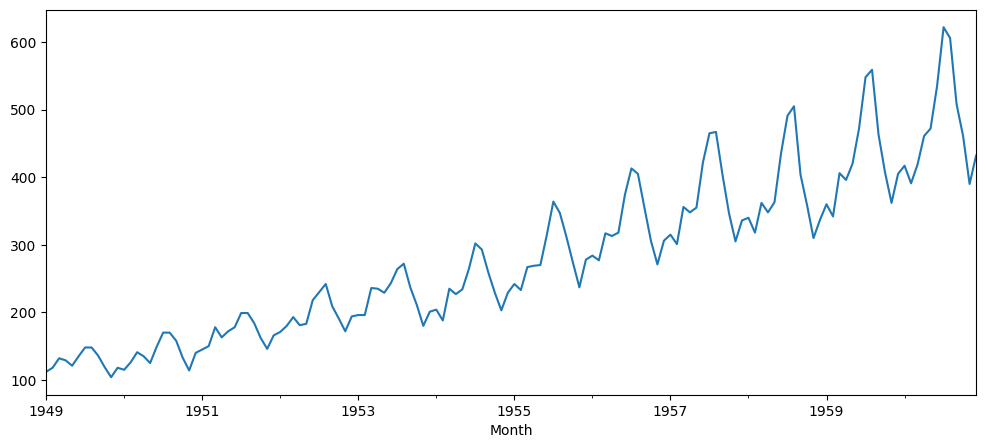

In [ ]:
# multiplicative
df['Passengers'].plot(figsize=(12, 5));

In [ ]:
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start = '2023-01-01', end = '2025-08-01', interval='1d')
stock_data.columns = stock_data.columns.droplevel('Ticker')
stock_data

/tmp/ipython-input-2013214517.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start = '2023-01-01', end = '2025-08-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,1175.889648,1177.304802,1163.244669,1164.066352,5316175
2023-01-03,1167.284668,1174.565828,1163.062148,1170.936659,7658932
2023-01-04,1149.709595,1169.110728,1147.632506,1167.261851,9264891
2023-01-05,1147.655396,1157.858149,1143.067616,1151.969321,13637099
2023-01-06,1158.086304,1163.130627,1149.595501,1153.407240,6349597
...,...,...,...,...,...
2025-07-25,1386.163696,1395.426749,1378.593954,1393.335127,11854722
2025-07-28,1382.080078,1402.199795,1379.490445,1386.761454,7748361
2025-07-29,1411.462769,1414.550412,1377.498442,1377.498442,10750072


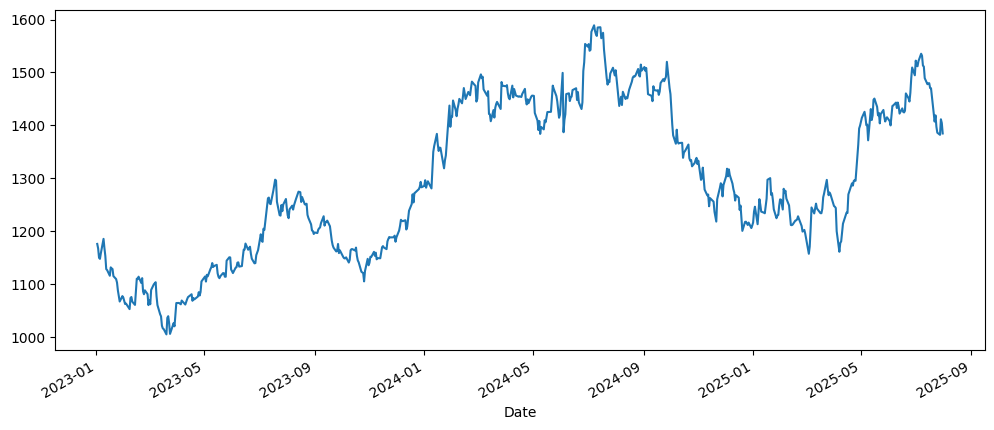

In [ ]:
stock_data['Close'].plot(figsize=(12, 5));

### Classical Time series decomposition

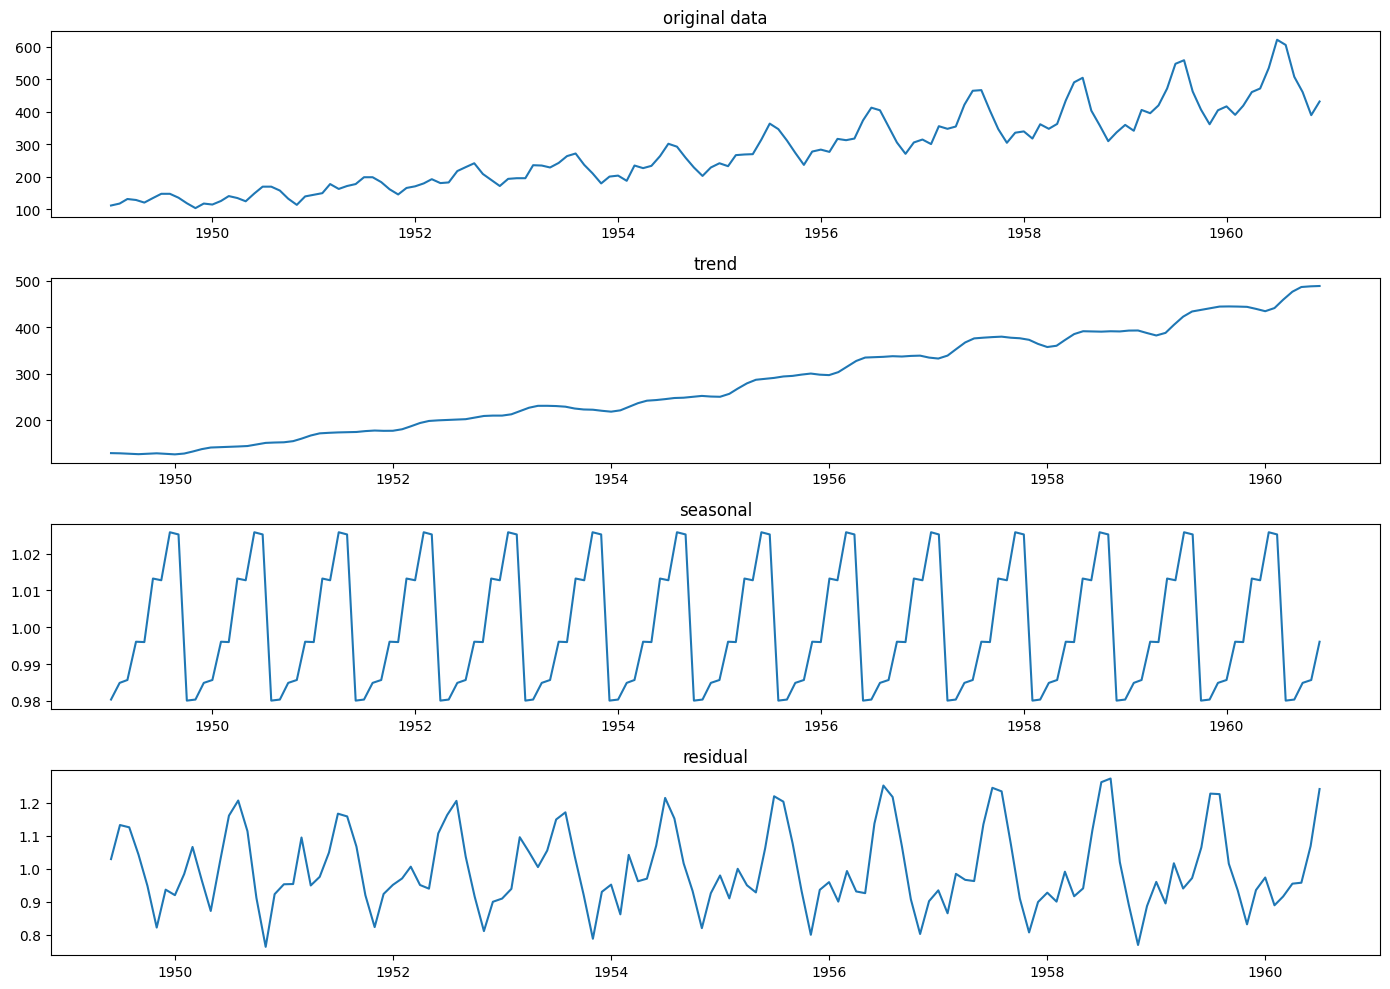

In [ ]:
sd = seasonal_decompose(df['Passengers'], model='multiplicative', period=10)

trend, seasonal, residual = sd.trend, sd.seasonal, sd.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df['Passengers'])
plt.title('original data')
plt.subplot(412)
plt.plot(trend)
plt.title('trend')
plt.subplot(413)
plt.plot(seasonal)
plt.title('seasonal')
plt.subplot(414)
plt.plot(residual)
plt.title('residual')
plt.tight_layout()
plt.show()

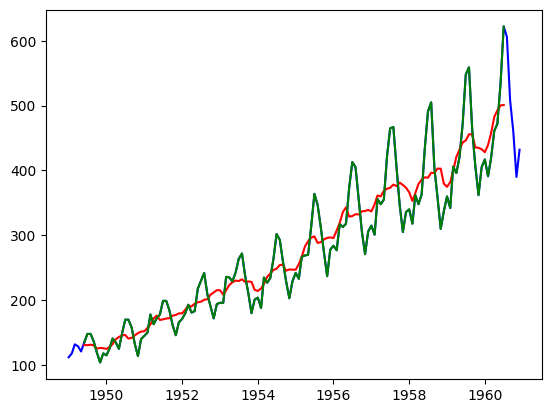

In [ ]:
estimate_tsr = trend * seasonal * residual
estimate_ts = trend * seasonal
plt.plot(df['Passengers'], color='blue')
plt.plot(estimate_ts, color='red')
plt.plot(estimate_tsr, color='green')
plt.show()

In [ ]:

def compare_MSE(data, period: int = 10):
    sd_mul = seasonal_decompose(data, model='multiplicative', period=period)
    trend_mul, seasonal_mul, residual_mul = sd_mul.trend, sd_mul.seasonal, sd_mul.resid
    estimate_ts_mul = trend_mul * seasonal_mul

    sd_add = seasonal_decompose(data, model='additive', period=period)
    trend_add, seasonal_add, residual_add = sd_add.trend, sd_add.seasonal, sd_add.resid
    estimate_ts_add = trend_add + seasonal_add

    return 'Multiplicative' if mean_squared_error(data, estimate_ts_mul.fillna(0)) > mean_squared_error(data, estimate_ts_add.fillna(0)) else 'Additive'

compare_MSE(df['Passengers']), compare_MSE(stock_data['Close'])

('Additive', 'Multiplicative')

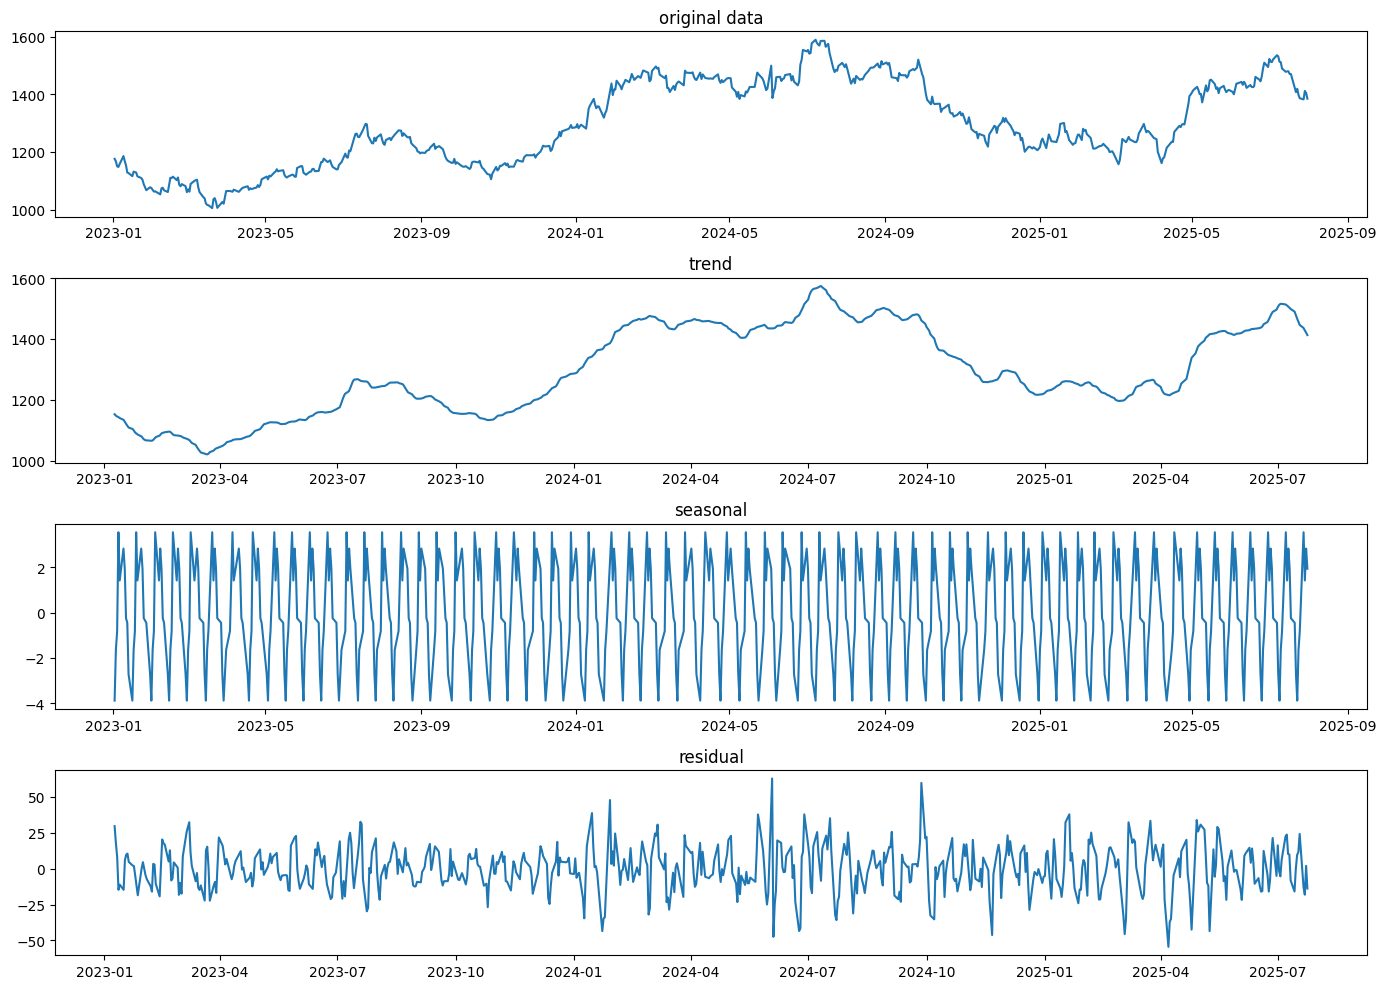

In [ ]:
sd = seasonal_decompose(stock_data['Close'], model='additive', period=10)

trend, seasonal, residual = sd.trend, sd.seasonal, sd.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'])
plt.title('original data')
plt.subplot(412)
plt.plot(trend)
plt.title('trend')
plt.subplot(413)
plt.plot(seasonal)
plt.title('seasonal')
plt.subplot(414)
plt.plot(residual)
plt.title('residual')
plt.tight_layout()
plt.show()

* assumes fixed seasonal patterns
* easily influenced by the outliers
* handle both but preferred for multiplicative models

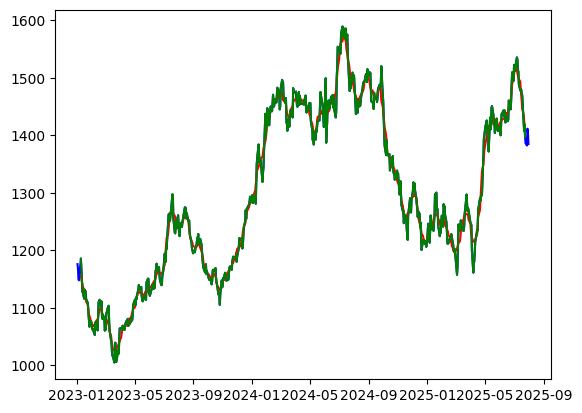

In [ ]:
estimate_tsr = trend + seasonal + residual
estimate_ts = trend + seasonal
plt.plot(stock_data['Close'], color='blue')
plt.plot(estimate_ts, color='red')
plt.plot(estimate_tsr, color='green')
plt.show()

### Seasonal Trend Loess(STL) Decomposition
[Locally Estimated Scatterplot Smoothing (LOESS)]
* variety seasonal pattern
* handle outliers in time series data
* only handle additive data

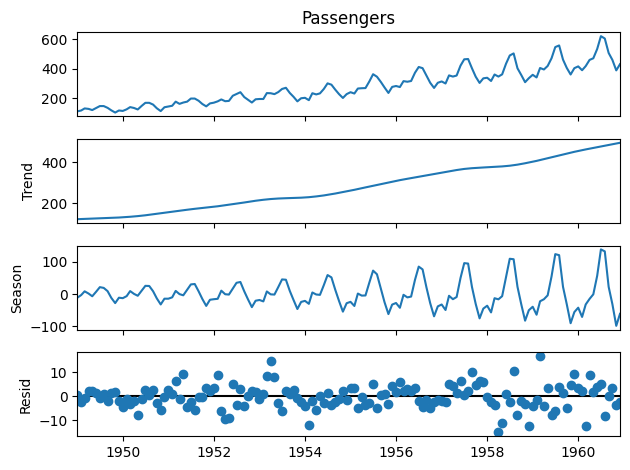

<Figure size 1200x500 with 0 Axes>

In [ ]:
res = STL(df['Passengers']).fit()

res.plot()
plt.figure(figsize=(12, 5))
plt.show()

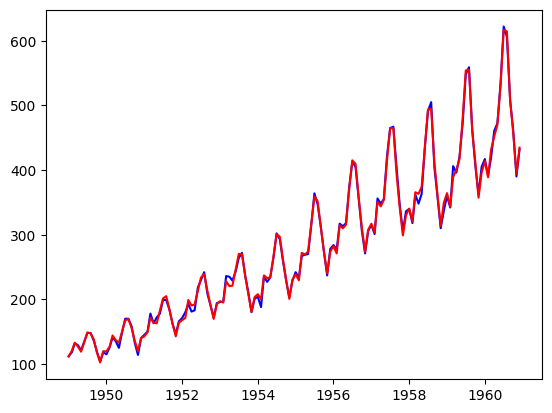

In [ ]:
estimate_ts = res.trend + res.seasonal
plt.plot(df['Passengers'], color='blue')
plt.plot(estimate_ts, color='red')
plt.show()

In [ ]:
sd = seasonal_decompose(df['Passengers'], model='multiplicative', period=10)

trend, seasonal = sd.trend, sd.seasonal

estimate_ts_STL = res.trend + res.seasonal
estimate_ts_CL = trend + seasonal

mean_squared_error(df['Passengers'], estimate_ts_STL.fillna(0)) < mean_squared_error(df['Passengers'], estimate_ts_CL.fillna(0))

True

### Stationarity

stationary seires is one whose statistical properties (mean, var, cov) doesn't vary with time. stationarity in Time series also means series without a trend or seasonality

### ADF Test

Null hypothesis: Series is non-stationary <br>
Alt hypothesis: Series is stationary

reject null if p-value < 0.05

In [ ]:
dftest = adfuller(df['Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
dfoutput # p-value > 0.05 ==> fail to reject null

,0
Test Statistic,0.815369
p-value,0.991880
#Lags used,13.000000
Number of observations used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


### KPSS Test

Null hypothesis: Series is stationary <br>
Alt hypothesis: Series is non-stationary

reject null if p-value < 0.05

In [ ]:
kpsstest = kpss(df['Passengers'], regression = 'c', nlags='auto')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic',  'p-value', '#Lags used'])
for key, value in kpsstest[3].items():
    kpss_output['Critical Value (%s)' %key] = value
kpss_output # p-value < 0.05 ==>  reject null'

/tmp/ipython-input-4262792615.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(df['Passengers'], regression = 'c', nlags='auto')


,0
Test Statistic,1.651312
p-value,0.010000
#Lags used,8.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


* both gives stationary / non-stationary ==> stationary / non-stationary
* ADF => non-stationary + KPSS => stationary ==> To make series strictly staionary remove trend component after decomposition
* ADF => stationary + KPSS => non-stationary ==> the series is difference stationary. differencing is to be used to make series stationary.

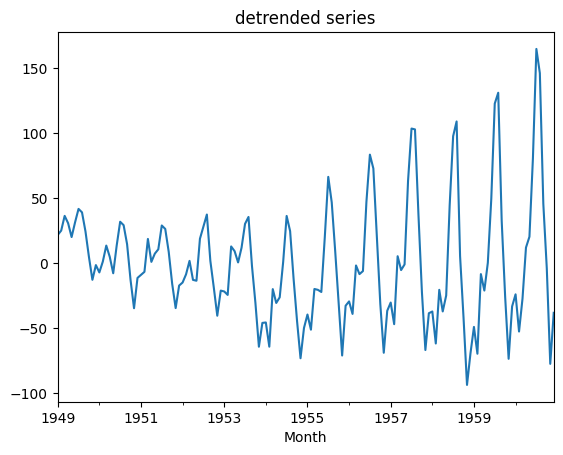

In [ ]:
X = np.arange(len(df)).reshape(-1, 1)
y = df['Passengers'].values
model = LinearRegression().fit(X, y)

# as linear regression is a straight and can be treated as trend
trend = model.predict(X)
df['detrended'] = y-model.predict(X)

df['detrended'].plot(title='detrended series')
plt.show()

In [ ]:
adf_orig_p = adfuller(df['Passengers'])[1]
adf_det_p = adfuller(df['detrended'])[1]

kpss_orig_p = kpss(df['Passengers'], regression='ct')[1]
kpss_det_p = kpss(df['detrended'], regression='c')[1]


print(f'ADF original p={adf_orig_p} -> {'Non-stationary' if adf_orig_p > 0.05 else 'Stationary'}')
print(f'KPSS original p={kpss_orig_p} -> {'Non-stationary' if kpss_orig_p < 0.05 else 'Stationary'}')
print(f'ADF detrended p={adf_det_p} -> {'Non-stationary' if adf_det_p > 0.05 else 'Stationary'}')
print(f'KPSS detrended p={kpss_det_p} -> {'Non-stationary' if kpss_det_p < 0.05 else 'Stationary'}')

ADF original p=0.991880243437641 -> Non-stationary
KPSS original p=0.1 -> Stationary
ADF detrended p=0.24372483602015022 -> Non-stationary
KPSS detrended p=0.1 -> Stationary


/tmp/ipython-input-3065679102.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_orig_p = kpss(df['Passengers'], regression='ct')[1]
/tmp/ipython-input-3065679102.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_det_p = kpss(df['detrended'], regression='c')[1]


### Make data stationary

#### Differencing

In [ ]:
df['difference'] = df['Passengers'].diff()
df

,Passengers,detrended,difference
Month,,,
1949-01-01,112,21.690038,NaN
1949-02-01,118,25.032854,6.0
1949-03-01,132,36.375670,14.0
1949-04-01,129,30.718487,-3.0
1949-05-01,121,20.061303,-8.0
...,...,...,...
1960-08-01,606,146.341475,-16.0
1960-09-01,508,45.684291,-98.0
1960-10-01,461,-3.972893,-47.0


In [ ]:
dftest = adfuller(df['difference'].dropna(), autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

dfoutput

,0
Test Statistic,-2.829267
p-value,0.054213
#Lags used,12.000000
Number of observations used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


#### Transformations
* if data is having low variance the following would work better

log, sqrt, boxcox

In [ ]:
dftest = adfuller(np.log(df['Passengers']), autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

dfoutput

,0
Test Statistic,-1.717017
p-value,0.422367
#Lags used,13.000000
Number of observations used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [ ]:
dftest = adfuller(np.sqrt(df['Passengers']), autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

dfoutput

,0
Test Statistic,-0.345854
p-value,0.918754
#Lags used,13.000000
Number of observations used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [ ]:
box_cox, lamda = boxcox(df['Passengers'][df['Passengers'] > 0])
dftest = adfuller(box_cox, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

dfoutput

,0
Test Statistic,-1.326071
p-value,0.617162
#Lags used,13.000000
Number of observations used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


### Forecasting

In [ ]:
!pip install prophet pmdarima xgboost tensorflow

In [ ]:
('TATAMOTORS_NSE_1995-2025.csv')